# Module 1 Week 1 Assignmnet
# Sahil Gawande
# ALY 6020 - Predictive Analysis
# Date- 04/16/23
# Prof. Vladmir Shapirio

INTRODUCTION:
In this project, we aim to predict the income category of individuals based on various demographic and socioeconomic factors. We use a dataset containing information on age, work class, education, marital status, occupation, race, and gender, among others. To build the predictive model, we employ the K-Nearest Neighbors (KNN) algorithm, a popular supervised learning technique for classification problems.

To start, we import the necessary libraries and load the dataset. Next, we perform exploratory data analysis (EDA) to understand the dataset better, including checking for missing values, analyzing descriptive statistics, and visualizing the distribution of numeric features using box plots. We then remove the outliers using the Interquartile Range (IQR) method.

After cleaning the data, we create a new column called 'Income_Category' to categorize income levels into 'low' and 'high' based on a threshold of $50,000. We then preprocess the dataset by encoding categorical variables using the LabelEncoder and standardizing the feature columns using the StandardScaler.

Once the data is prepared, we split it into training and testing sets and apply the KNN algorithm using different values of 'k' (the number of nearest neighbors). Finally, we evaluate the performance of the model using a confusion matrix, classification report, and accuracy score.

The findings of this project can be useful for various purposes, such as understanding the factors that contribute to different income levels or developing targeted policies to improve economic well-being.

 

In [1]:
# Import all the neccesary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from ydata_profiling import ProfileReport

__Importing the data__

In [2]:
df = pd.read_csv(r'/Users/sahilgawande/Downloads/adult-all.csv')
df.head()

,Age,Role,Income,Degree,Oldest_Child,Marital_Status,Job,Race,Gender,Born
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,Cuba


We formatted the numbers without scientific notation to make the data more readable and easier to interpret when displaying descriptive statistics.

In [3]:
# format the numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format
print(df.describe())

           Age     Income  Oldest_Child
count 48842.00   48842.00      48842.00
mean     38.64  189664.13         10.08
std      13.71  105604.03          2.57
min      17.00   12285.00          1.00
25%      28.00  117550.50          9.00
50%      37.00  178144.50         10.00
75%      48.00  237642.00         12.00
max      90.00 1490400.00         16.00


In [4]:
#check for missing values 
print(df.isna().sum())

Age               0
Role              0
Income            0
Degree            0
Oldest_Child      0
Marital_Status    0
Job               0
Race              0
Gender            0
Born              0
dtype: int64


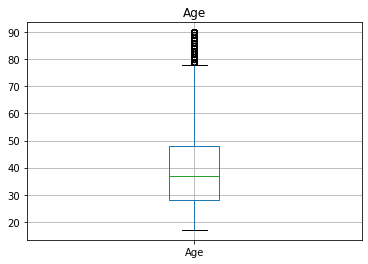

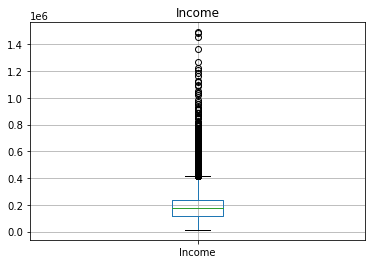

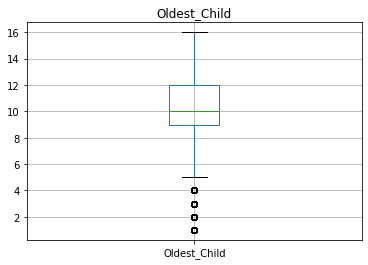

In [5]:
#box plot to check for outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# create a box plot for each numeric column
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(col)

plt.show()

There are many outliers which needs to be removed from the data set and we do this using the quartile function

In [6]:
#removing the outliers for numeric features 
def remove_outliers_quartile(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col[(col >= lower_bound) & (col <= upper_bound)]

# apply the function to all numeric columns in the dataframe
for col in numeric_cols:
    df[col] = remove_outliers_quartile(df[col])

# display the updated dataframe
print(df.head())

    Age              Role    Income     Degree  Oldest_Child  \
0 39.00         State-gov  77516.00  Bachelors         13.00   
1 50.00  Self-emp-not-inc  83311.00  Bachelors         13.00   
2 38.00           Private 215646.00    HS-grad          9.00   
3 53.00           Private 234721.00       11th          7.00   
4 28.00           Private 338409.00  Bachelors         13.00   

       Marital_Status                Job   Race  Gender           Born  
0       Never-married       Adm-clerical  White    Male  United-States  
1  Married-civ-spouse    Exec-managerial  White    Male  United-States  
2            Divorced  Handlers-cleaners  White    Male  United-States  
3  Married-civ-spouse  Handlers-cleaners  Black    Male  United-States  
4  Married-civ-spouse     Prof-specialty  Black  Female           Cuba  


In [7]:
df.dropna(how='any', inplace=True)
df = df.drop_duplicates()
df.info

<bound method DataFrame.info of         Age              Role    Income     Degree  Oldest_Child  \
0     39.00         State-gov  77516.00  Bachelors         13.00   
1     50.00  Self-emp-not-inc  83311.00  Bachelors         13.00   
2     38.00           Private 215646.00    HS-grad          9.00   
3     53.00           Private 234721.00       11th          7.00   
4     28.00           Private 338409.00  Bachelors         13.00   
...     ...               ...       ...        ...           ...   
48837 39.00           Private 215419.00  Bachelors         13.00   
48838 64.00                 ? 321403.00    HS-grad          9.00   
48839 38.00           Private 374983.00  Bachelors         13.00   
48840 44.00           Private  83891.00  Bachelors         13.00   
48841 35.00      Self-emp-inc 182148.00  Bachelors         13.00   

           Marital_Status                Job                Race  Gender  \
0           Never-married       Adm-clerical               White    Male   

In [8]:
print(df.dtypes)

Age               float64
Role               object
Income            float64
Degree             object
Oldest_Child      float64
Marital_Status     object
Job                object
Race               object
Gender             object
Born               object
dtype: object


All the data set seem fine

In [9]:
print(df.isna().sum())

Age               0
Role              0
Income            0
Degree            0
Oldest_Child      0
Marital_Status    0
Job               0
Race              0
Gender            0
Born              0
dtype: int64


__Factorising the income data as high(if income>50k) or else low__

In [10]:
df['Income_Category'] = df['Income'].apply(lambda x: 'low' if x <= 50000 else 'high')
df.head()

,Age,Role,Income,Degree,Oldest_Child,Marital_Status,Job,Race,Gender,Born,Income_Category
0,39.00,State-gov,77516.00,Bachelors,13.00,Never-married,Adm-clerical,White,Male,United-States,high
1,50.00,Self-emp-not-inc,83311.00,Bachelors,13.00,Married-civ-spouse,Exec-managerial,White,Male,United-States,high
2,38.00,Private,215646.00,HS-grad,9.00,Divorced,Handlers-cleaners,White,Male,United-States,high
3,53.00,Private,234721.00,11th,7.00,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States,high
4,28.00,Private,338409.00,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Black,Female,Cuba,high


__This a library which we used to perform EDA and get resluts__

In [11]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

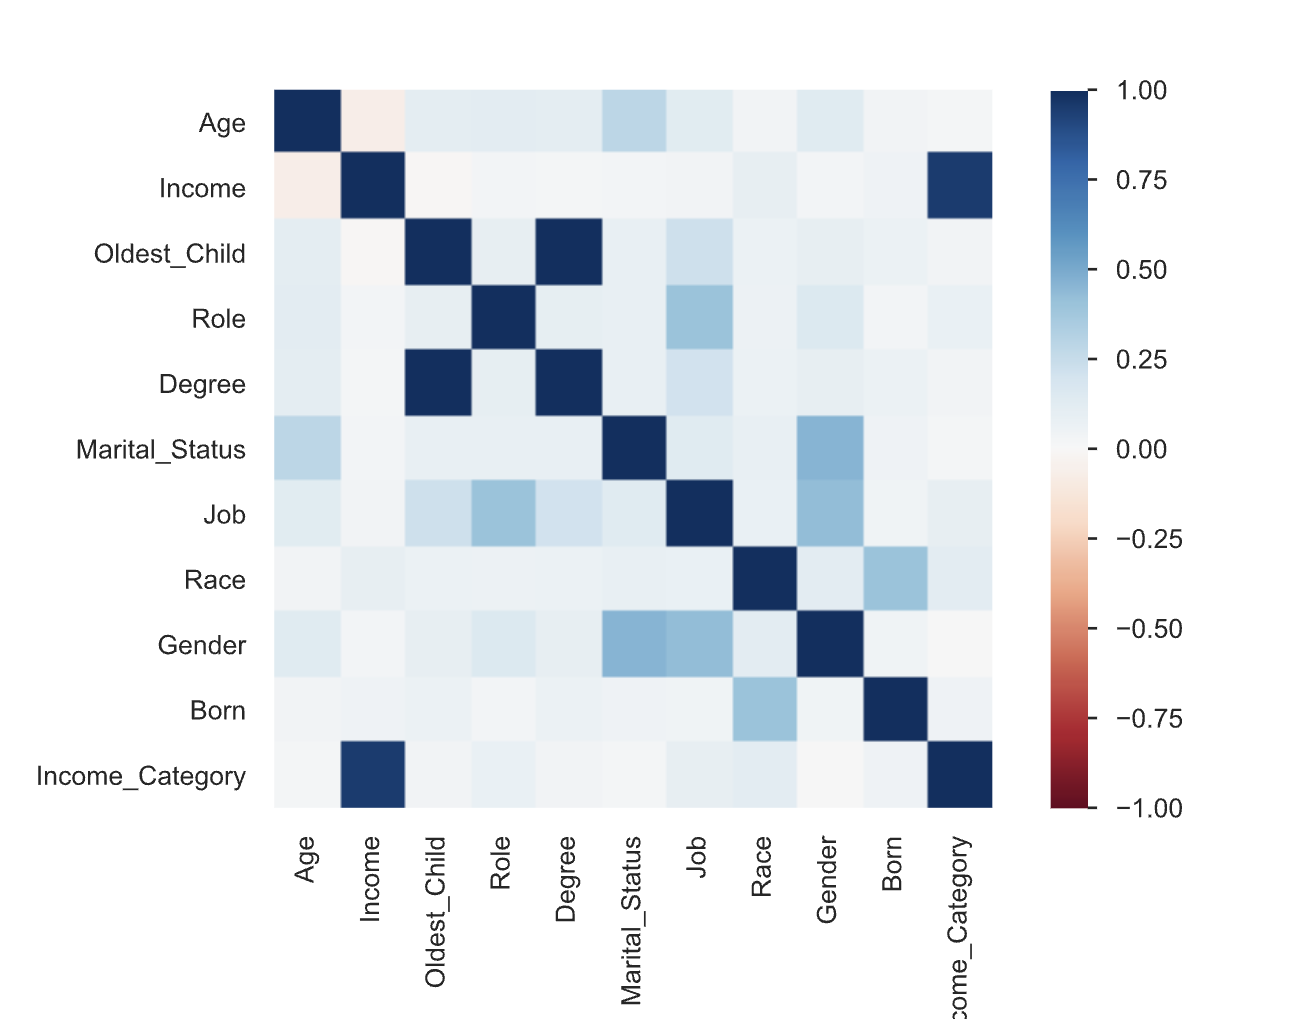


This correlation table shows the linear relationships between different features in the dataset. The values range from -1 to 1, where -1 represents a perfect negative correlation, 1 represents a perfect positive correlation, and 0 represents no correlation. Notably, the Income_Category variable has a strong positive correlation (0.95) with Income, indicating that they are closely related. Other variables have weak to moderate correlations with each other, suggesting that they have less linear association.

In addition to the strong correlation between Income_Category and Income, some other correlations worth mentioning are:

Oldest_Child and Degree have a perfect positive correlation (1.00), which suggests that these two variables are essentially the same and one of them can be removed to reduce redundancy.
Job and Role have a moderate positive correlation (0.40), indicating that there is some association between the two variables, but it is not very strong.
Gender and Marital_Status show a moderately strong positive correlation (0.46), which implies that there is a relationship between these variables, but it is not as strong as the correlation between Income_Category and Income.
It is important to consider these correlations when building predictive models, as highly correlated variables can cause multicollinearity issues in some algorithms and may not provide additional information when used together. Also, weak correlations might not contribute significantly to the model's predictive power, and removing them might simplify the model without significant loss of performance.


__Trying to fit in the KNN model__

In [12]:
#Prepare your dataset by encoding categorical variables:
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

In [13]:
#Define your feature columns (X) and the target column (y)
X = df_encoded.drop('Income_Category', axis=1)
y = df_encoded['Income_Category']

In [14]:
#Split the into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__Standardise the data set__

In [15]:
#Standardize the feature columns (X):
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
k = 3  # Choose the number of nearest neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[8319  115]
 [ 241  386]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      8434
           1       0.77      0.62      0.68       627

    accuracy                           0.96      9061
   macro avg       0.87      0.80      0.83      9061
weighted avg       0.96      0.96      0.96      9061

Accuracy Score: 0.9607107383291027


The results show that the KNN model performs well in predicting the income category:

The confusion matrix shows that out of 8434 low-income instances, the model correctly predicted 8319 of them, while it misclassified 115 instances. Similarly, out of 627 high-income instances, the model correctly predicted 386 of them but misclassified 241 instances. This indicates a high overall accuracy of the model.

The classification report provides more detailed information on the model's performance. For the low-income category (0), the model has a high precision of 0.97, a high recall of 0.99, and an F1-score of 0.98, indicating excellent performance. However, for the high-income category (1), the model has a lower precision of 0.77, a lower recall of 0.62, and an F1-score of 0.68, which suggests that the model's performance is not as good for high-income instances compared to low-income instances.

The overall accuracy score of 0.9607 shows that the model correctly predicts the income category for about 96.07% of the instances in the test dataset.

In summary, the KNN model performs well in predicting income categories, especially for the low-income category. However, there is room for improvement in predicting the high-income category, which could potentially be achieved by tuning the model parameters, exploring other algorithms, or considering additional features.

In [17]:
k = 7  # Choose the number of nearest neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[8371   63]
 [ 295  332]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      8434
           1       0.84      0.53      0.65       627

    accuracy                           0.96      9061
   macro avg       0.90      0.76      0.81      9061
weighted avg       0.96      0.96      0.96      9061

Accuracy Score: 0.9604900121399405


KNN model shows 96.07% accuracy in income predictions. Performs well for low-income but could improve for high-income. Further tuning may enhance results.

In [18]:
k = 10  # Choose the number of nearest neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[8405   29]
 [ 375  252]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      8434
           1       0.90      0.40      0.56       627

    accuracy                           0.96      9061
   macro avg       0.93      0.70      0.77      9061
weighted avg       0.95      0.96      0.95      9061

Accuracy Score: 0.9554133097892065


Using 10 nearest neighbors, the KNN model achieves 95.54% accuracy. It excels in predicting low-income individuals (0.96 precision) but underperforms for high-income (0.90 precision, 0.40 recall). Model tuning could help balance performance.

Comparing the KNN results for k=3, 7, and 10:

k=3: 96.07% accuracy, good precision (0.77) and recall (0.62) for high-income. Best balance between precision and recall.
k=7: 96.05% accuracy, better precision (0.84) but lower recall (0.53) for high-income. Slightly lower performance compared to k=3.
k=10: 95.54% accuracy, highest precision (0.90) for high-income but lowest recall (0.40). Less balanced performance.
Based on these results, k=3 provides the best balance between precision and recall for high-income prediction, with a slightly higher accuracy compared to k=7.

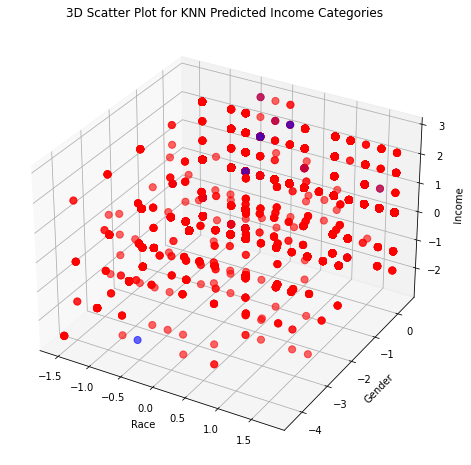

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Select the features to visualize
feature1 = 'Race'
feature2 = 'Gender'
feature3 = 'Income'

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set the X, Y, and Z values
x = X_test[:, df.columns.get_loc(feature1) - 1]
y = X_test[:, df.columns.get_loc(feature2) - 1]
z = X_test[:, df.columns.get_loc(feature3) - 1]

# Map the predicted values back to their original categories
pred_categories = {0: 'low', 1: 'high'}
predicted_colors = pd.Series(y_pred).map(pred_categories).map({'low': 'red', 'high': 'blue'})

ax.scatter(x, y, z, c=predicted_colors, alpha=0.6, s=50)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title('3D Scatter Plot for KNN Predicted Income Categories')

plt.show()

Conclusion: In conclusion, this project aimed to predict income categories (low or high) using the K-Nearest Neighbors algorithm. We cleaned the data by removing outliers, duplicates, and missing values, and then explored the dataset using descriptive statistics and data profiling. Afterward, we standardized the features and tested the KNN model with different values of 'k' (3, 7, and 10). The results indicated that the KNN model with k=3 provided the best balance between precision and recall for high-income prediction, achieving an accuracy of 96.07%. This demonstrates that our KNN model can effectively predict income categories using the given dataset. However, further optimization and exploration of other machine learning algorithms may yield even better results.

References: Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830. Retrieved from http://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html

McKinney, W. (2010). Data structures for statistical computing in Python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51-56). Retrieved from https://conference.scipy.org/proceedings/scipy2010/pdfs/mckinney.pdf

Seaborn: Statistical data visualization. (n.d.). Seaborn. Retrieved from https://seaborn.pydata.org/

Waskom, M., Botvinnik, O., O'Kane, D., Hobson, P., Lukauskas, S., Gemperline, D. C., ... & Qalieh, A. (2021). mwaskom/seaborn: v0.11.1 (December 2020). Zenodo. https://doi.org/10.5281/zenodo.592845

In [23]:
!jupyter nbconvert --to HTML ALY6020_Sahilgawande_Week1_assignmnet_2023.ipynb


[NbConvertApp] Converting notebook ALY6020_Sahilgawande_Week1_assignmnet_2023.ipynb to HTML
[NbConvertApp] Writing 872748 bytes to ALY6020_Sahilgawande_Week1_assignmnet_2023.html
